In [4]:
# Author: Lucas Glasner
# Date: 2024-06-09
# Contact: lgvivanco96@gmail.com
library("openxlsx")
library("tibble")
source("fit_utils.R")
source("test_utils.R")
source("global_utils.R")

In [ ]:
path <- "data/qmax.xlsx"
outdir <- "data/"
sheet <- "Sheet1"
df <- read.xlsx(path, sheet = sheet, colNames = TRUE, rowNames = TRUE)

In [2]:
print(colnames(df))
col             <- "7335002"
dir.create(paste(outdir, col, sep = "/"), showWarnings = FALSE)


fix_zeros       <- TRUE
target_rperiods <- c(2, 5, 10, 20, 25, 50, 75, 100, 150, 200)
model_rperiods  <- c(seq(1.001, 1.009, 0.001), seq(1.01, 1.09, 0.01),
                     seq(1.1, 5, 0.1), seq(10, 1000, 5))
methods <- c("mle", "mme", "lmme")
distrs  <- c("norm", "lognorm", "gamma", "pearson3",
             "logpearson3", "gumbel", "gev")

[1] "7335002"


In [3]:
results <- list()
for (method in methods) {
  for (distr in distrs) {
    tryCatch({
      result <- run_probmodel(df[col], method, distr,
                              model_rperiods, target_rperiods,
                              fix_zeros)
      results[[paste(distr, method, sep = "_")]] <- result
    }, error = function(e) {
      message(sprintf("Error in run_probmodel with method = %s, distr = %s: %s",
                      method, distr, e$message))
    })
  }
}

eva_table <- results[[1]]$eva_table
statistics <- results[[1]]$statistics
metrics <- do.call(cbind, lapply(results, function(res) res$metrics))
models  <- do.call(cbind, lapply(results, function(res) res$model_quant))
targets <- do.call(cbind, lapply(results, function(res) res$target_quant))
params <- do.call(pad_and_bind, lapply(results, function(res) res$params))
params <- as.data.frame(params)
colnames(params) <- c("loc", "scale", "shape")

metrics <- metrics[, order(t(-metrics["adpvalue", ]))]
models  <- models[, colnames(metrics)]
targets <- targets[, colnames(metrics)]
params  <- params[colnames(metrics), ]

Warning message in ks.test.default(x, pprobmodel, distr, params):
"ties should not be present for the one-sample Kolmogorov-Smirnov test"
Warning message in ks.test.default(x, pprobmodel, distr, params):
"ties should not be present for the one-sample Kolmogorov-Smirnov test"
Warning message in ks.test.default(x, pprobmodel, distr, params):
"ties should not be present for the one-sample Kolmogorov-Smirnov test"
Warning message in ks.test.default(x, pprobmodel, distr, params):
"ties should not be present for the one-sample Kolmogorov-Smirnov test"
Warning message in ks.test.default(x, pprobmodel, distr, params):
"ties should not be present for the one-sample Kolmogorov-Smirnov test"
Warning message in fitdist(x, dist = "gumbel", method = method, start = fgumbel(x), :
"The dgumbel function should return a vector of with NaN values when input has inconsistent parameters and not raise an error"
Warning message in fitdist(x, dist = "gumbel", method = method, start = fgumbel(x), :
"The pgumbe

png 
  3

png 
  2

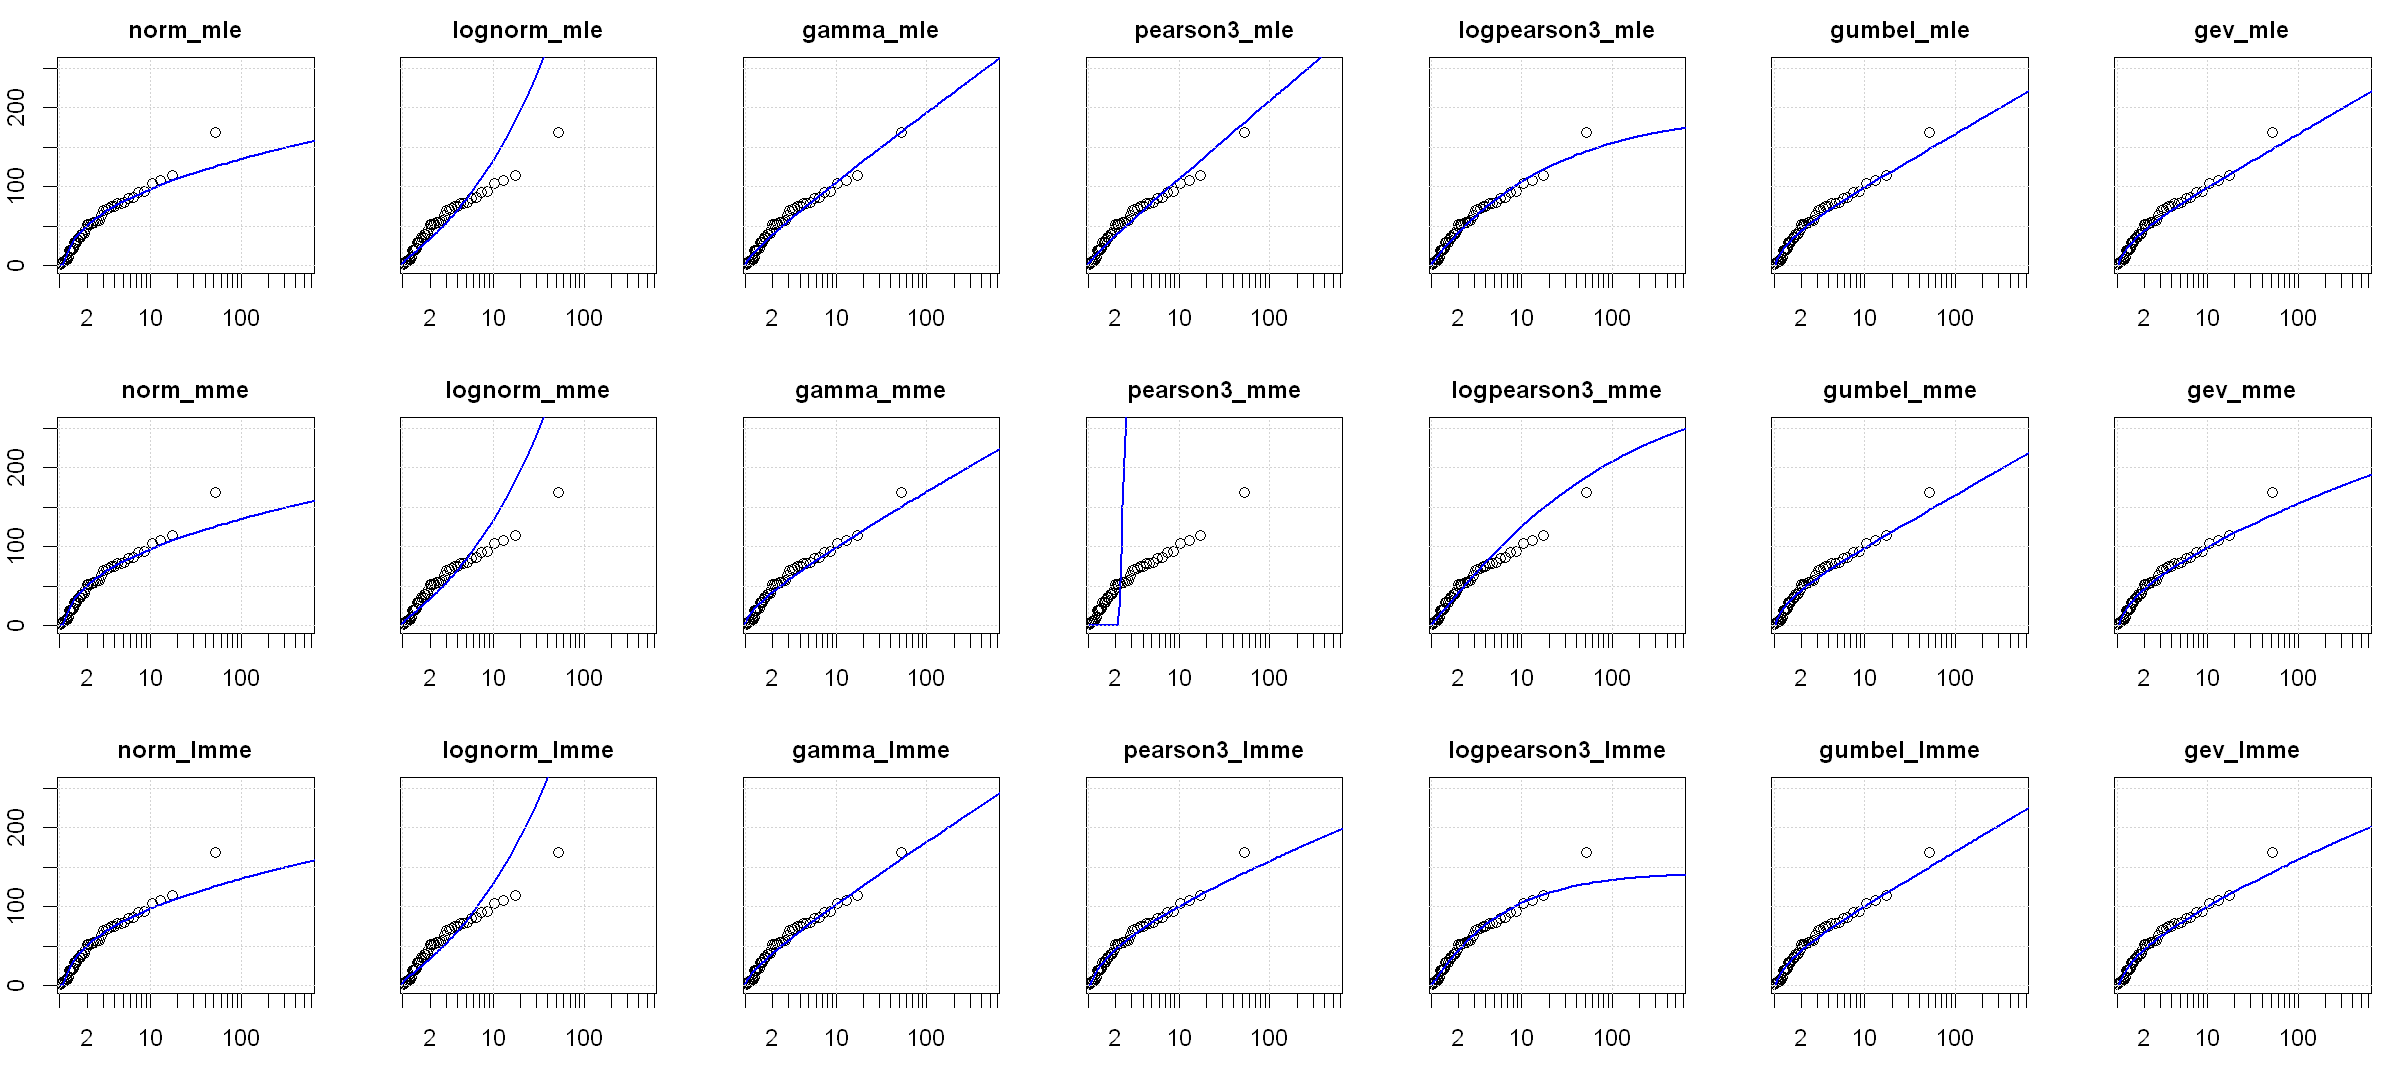

In [4]:

options(repr.plot.width = 20, repr.plot.height = 9)
par(mfrow = c(3, 7), mar = c(3, 2, 2, 1), cex = 1.2)

axis_ticks <- c(1, 2, 3, 4, 5, 6, 7, 8, 9,
                10, 20, 30, 40, 50, 60, 70, 80, 90,
                100, 200, 300, 400, 500, 600, 700, 800, 900,
                1000)
axis_labels <- rep(NA, length(axis_ticks))
mask <- axis_ticks %in% c(2, 10, 100, 1000)
axis_labels[mask] <- axis_ticks[mask]

for (i in seq_along(results)) {
  res <- results[[i]]
  y_axis <- ((i - 1) %% 7) == 0
  plot(res$eva_table$rperiod, res$eva_table$data, log = "x",
     xlab = "T",
     xlim = c(1.2, 500),
     ylim = c(0, eva_table[1, 2] * 1.5),
     yaxt = if (y_axis) "s" else "n",
     xaxt = "n",
     main = names(results)[i], cex.main = 1)
  axis(1, at = axis_ticks, labels = axis_labels)
  lines(model_rperiods, res$model_quant[, 1],
    col = "blue", lwd = 2)
  grid()
}

par(mfrow = c(1, 1))

dev.copy(png,
         filename = file.path(outdir, paste0(col, "/ModelsPerformance.png")),
         width = 1500, height = 900, res = 100)
dev.off()

In [5]:
targets

,pearson3_lmme,gev_lmme,gev_mme,logpearson3_mle,gumbel_lmme,gumbel_mle,gev_mle,norm_lmme,norm_mle,norm_mme,⋯,logpearson3_mme,gamma_mle,pearson3_mle,gamma_lmme,gamma_mme,lognorm_mle,lognorm_mme,lognorm_lmme,pearson3_mme,logpearson3_lmme
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,45.69194,45.66952,46.26201,41.72239,44.34381,44.34065,44.33256,50.57980,50.57980,50.57980,⋯,41.43692,39.11692,37.79169,40.91594,42.26862,33.88978,33.88978,33.88978,0.000,44.83540
5,79.51183,79.09844,79.19457,82.49359,77.88890,77.10778,77.08666,81.18199,81.02009,81.02009,⋯,91.53993,78.00182,79.38212,77.32945,75.92594,83.44233,83.44233,81.55924,1089.905,85.28014
10,100.14850,99.98436,99.28828,106.32918,100.09867,98.80248,98.76520,97.17829,96.93177,96.93177,⋯,125.14288,105.69013,109.81988,102.70006,98.89176,133.63958,133.63958,129.07436,1833.892,104.77943
20,118.78838,119.13372,117.37500,125.27209,121.40281,119.61254,119.55415,110.38832,110.07191,110.07191,⋯,154.61641,132.65978,139.82898,127.16950,120.82817,197.17640,197.17640,188.57346,2506.491,117.81743
25,124.49580,125.03333,122.88104,130.48272,128.16077,126.21378,126.14753,114.23649,113.89972,113.89972,⋯,163.23821,141.23618,149.42658,134.91414,127.73850,220.83223,220.83223,210.59183,2712.534,120.99994
50,141.54336,142.69562,139.17491,144.33529,148.97883,146.54904,146.45513,125.25616,124.86109,124.86109,⋯,187.46863,167.63148,179.09316,158.66332,148.85218,305.47356,305.47356,288.92358,3328.202,128.57022
75,151.12534,152.61625,148.19984,151.01798,161.07909,158.36868,158.25626,131.16896,130.74261,130.74261,⋯,199.96040,182.93174,196.36362,172.37994,161.00192,363.56501,363.56501,342.35450,3674.394,131.74062
100,157.78016,159.48859,154.39719,155.21435,169.64318,166.73416,166.60758,135.16813,134.72062,134.72062,⋯,208.12566,193.73616,208.58670,182.04759,169.54854,408.99728,408.99728,383.98909,3914.883,133.56396
150,166.98297,168.95355,162.85847,160.44961,181.69307,178.50459,178.35656,140.56380,140.08775,140.08775,⋯,218.71460,208.90138,225.77688,195.59445,181.50396,479.42006,479.42006,448.29800,4247.519,135.65105


In [ ]:
colnames(df)

[1] "CALAMA"                 "AD. CALAMA DMC"         "SIERRA GORDA"          
 [4] "BAQUEDANO"              "CERRO MORENO DMC"       "PEINE"                 
 [7] "AGUAS VERDES"           "TAL-TAL"                "LAS VEGAS"             
[10] "PASTOS GRANDES"         "CALDERA AP. DMC"        "COPIAPO"               
[13] "JORQUERA EN LA GUARDIA" "LOS LOROS"

In [6]:
selected_models <- list()
selected_models["7335002"] <- "gev_lmme"

png 
  3

png 
  2

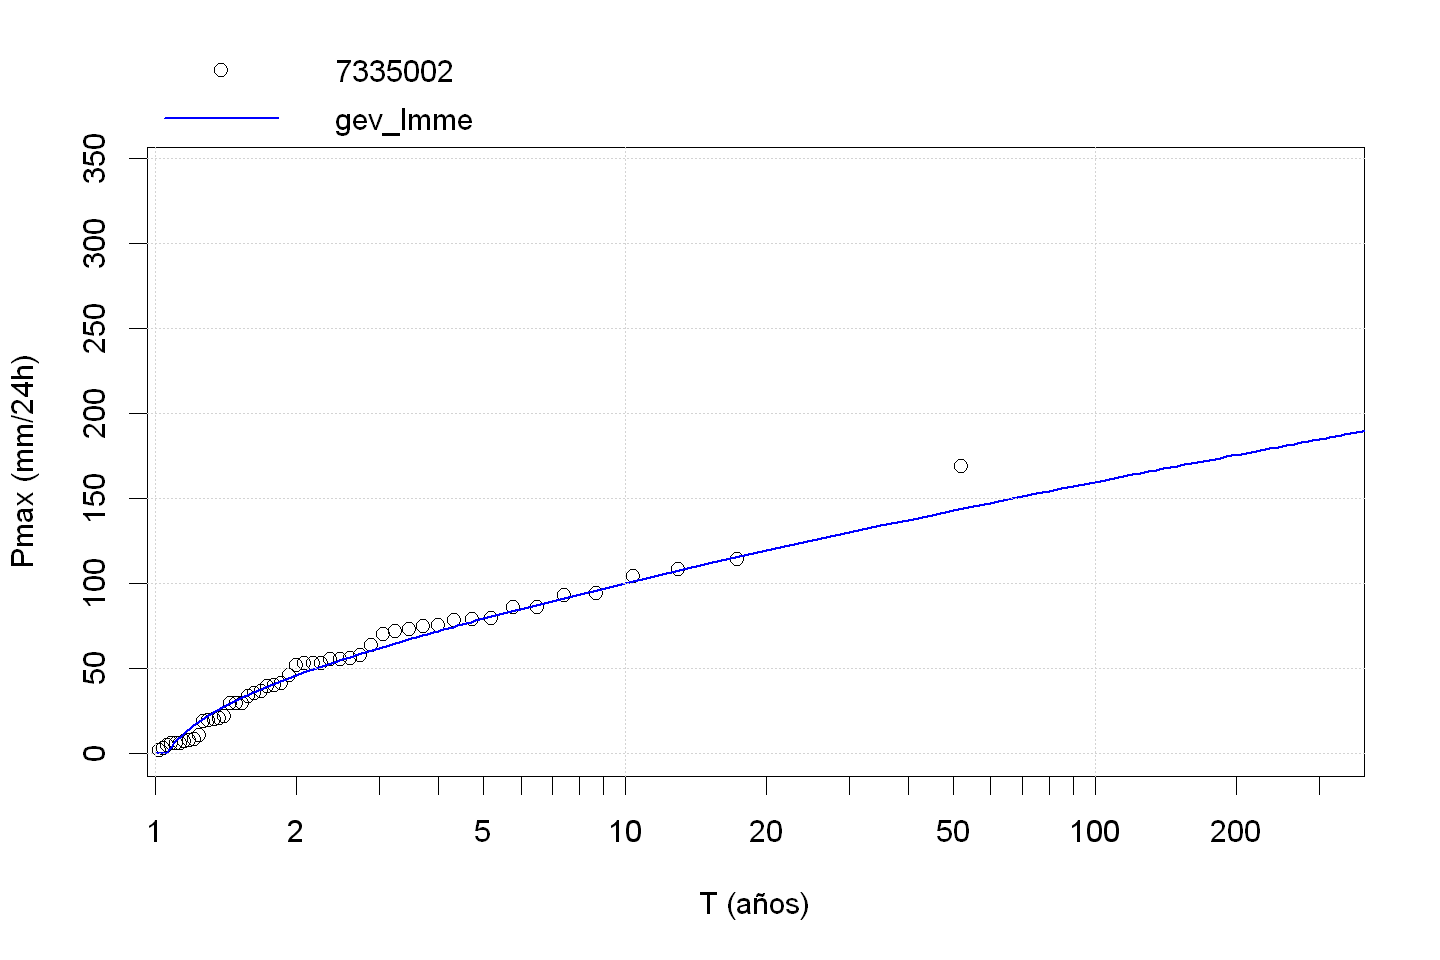

In [7]:
selected_model <- selected_models[[col]]

options(repr.plot.width = 12, repr.plot.height = 8)
par(cex = 1.5)
res <- results[[selected_model]]
plot(res$eva_table$rperiod, res$eva_table$data, log = "x",
  xlim = c(1.2, 300), ylim = c(0, statistics$mean+8*statistics$sd),
  xlab = "T (años)", ylab = "Pmax (mm/24h)")
lines(model_rperiods, res$model_quant[, 1],
   col = "blue", lwd = 2)
axis(1, at = axis_ticks, labels = axis_labels)
grid()
legend("topleft",
       inset = c(0, -0.2), xpd = TRUE,
       legend = c(col, selected_model),
       col = c("black", "blue"),
       lty = c(NA, 1), pch = c(1, NA), lwd = c(NA, 2), bty = "n") # bty="n" for no box
dev.copy(png,
  filename = file.path(outdir, paste0(col, "/FinalModel.png")),
  width = 1400, height = 900, res = 100)
dev.off()


In [8]:
# Write results into disk as an excel spreadsheet
wb <- createWorkbook()

addWorksheet(wb, sheetName = "EVA_Table")
addWorksheet(wb, sheetName = "Statistics")
addWorksheet(wb, sheetName = "CalibrationParams")
addWorksheet(wb, sheetName = "FitModels")
addWorksheet(wb, sheetName = "FitResults")
addWorksheet(wb, sheetName = "PerformanceMetrics")
addWorksheet(wb, sheetName = "FinalModel")
addWorksheet(wb, sheetName = "FinalResults")
addWorksheet(wb, sheetName = "FinalMetrics")

writeData(wb, sheet = "EVA_Table", x = eva_table)
writeData(wb, sheet = "Statistics", x = statistics)
writeData(wb, sheet = "CalibrationParams",
          x = tibble::rownames_to_column(params, "distr"))
writeData(wb, sheet = "FitModels",
          x = tibble::rownames_to_column(models, "T"))
writeData(wb, sheet = "FitResults",
          x = tibble::rownames_to_column(targets, "T"))
writeData(wb, sheet = "PerformanceMetrics",
          x = tibble::rownames_to_column(metrics, "metric"))
writeData(wb, sheet = "FinalModel",
          x = tibble::rownames_to_column(models[selected_model], "T"))
writeData(wb, sheet = "FinalResults",
          x = tibble::rownames_to_column(targets[selected_model], "T"))
writeData(wb, sheet = "FinalMetrics",
          x = tibble::rownames_to_column(metrics[selected_model], "metric"))

saveWorkbook(wb, file = file.path(outdir, paste0(col, '/', col, ".xlsx")),
             overwrite = TRUE)